# Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from math import sqrt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the ANN for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Initialising the ANN
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='linear')
])

In [0]:
# Compilando nuestro modelo para poder calcular los parametros de nuestro modelo
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mse','mae'])

In [0]:
# Hacermos el fit del modelo hacia nuestros datos
model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100, verbose=1, validation_split=0.2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

50/50 [==============================] - 0s 5ms/step - loss: 2198.5093 - mse: 2236.0728 - mae: 31.6752 - val_loss: 272.5488 - val_mse: 260.5816 - val_mae: 13.9567


In [0]:
# Verificamos la dimensionalidad de nuestras capas
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1152      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  8256      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Evaluamos nuestro modelo con el set de prueba
test = model.evaluate(X_test,  y_test)
test

5/5 [==============================] - 0s 2ms/step - loss: 257.8020 - mse: 258.5710 - mae: 14.1917


[257.8020324707031, 258.57098388671875, 14.191699981689453]

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

array([[-2.04829178e+01],
       [-3.70231605e+00],
       [-3.10067177e+00],
       [-1.87632814e-01],
       [-1.60680733e+01],
       [-2.90326500e+00],
       [-1.01550703e+01],
       [-1.78420467e+01],
       [-1.19811745e+01],
       [-5.84531784e+00],
       [-9.33664143e-01],
       [-1.66535492e+01],
       [-8.56577396e+00],
       [-1.80634003e+01],
       [-2.25663643e+01],
       [-5.90893984e+00],
       [-5.41149282e+00],
       [-1.47644949e+00],
       [-1.49217024e+01],
       [-1.12162466e+01],
       [-1.28475599e+01],
       [-1.75690651e+01],
       [-5.12250042e+00],
       [-1.04671516e+01],
       [-8.24769139e-01],
       [-1.87213745e+01],
       [-7.41657591e+00],
       [-2.30029831e+01],
       [-2.41039276e+00],
       [-1.49701128e+01],
       [-8.73530865e+00],
       [-1.30689230e+01],
       [-1.94732761e+01],
       [-1.15679331e+01],
       [-1.15649252e+01],
       [-1.21192141e+01],
       [-2.00010109e+01],
       [-1.51211882e+01],
       [-1.7

In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heating = test[1]
mse_heating

258.57098388671875

In [0]:
# Calculamos el Mean Absolute Error
mae_heating = test[2]
mae_heating

14.191699981689453

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error_heating = sqrt(mse_heating)
root_mean_squared_error_heating

16.0801425331593

Text(0, 0.5, 'Heating Load')

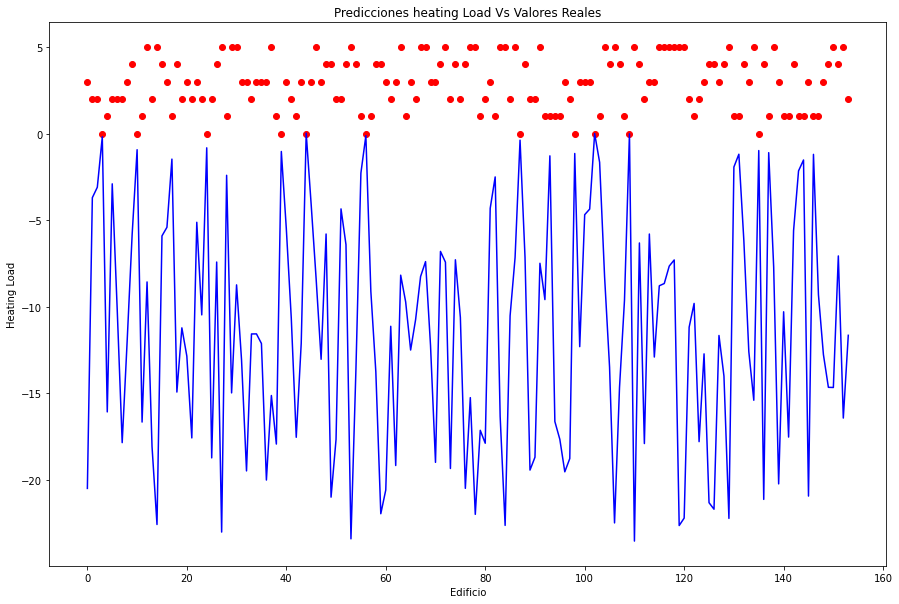

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

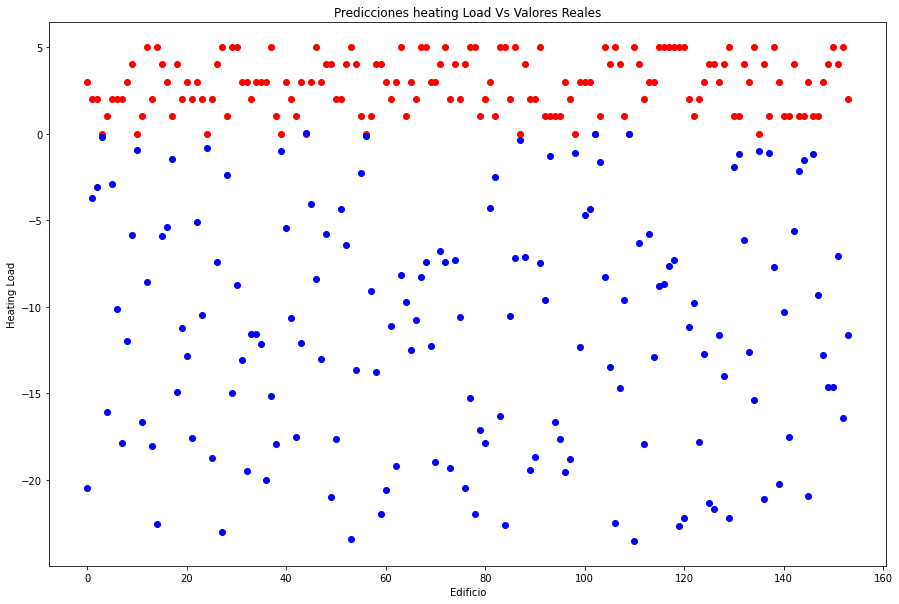

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the ANN for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Initialising the ANN
model_cooling = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='linear')
])

In [0]:
# Compilando nuestro modelo para poder calcular los parametros de nuestro modelo
model_cooling.compile(optimizer = 'adam', loss = 'mse', metrics=['mse','mae'])

In [0]:
# Hacermos el fit del modelo hacia nuestros datos
model_cooling.fit(X_train_cooling, y_train_cooling, batch_size = 10, nb_epoch = 100, verbose=1, validation_split=0.2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

50/50 [==============================] - 0s 4ms/step - loss: 1773.4630 - mse: 1802.7297 - mae: 31.4584 - val_loss: 191.7233 - val_mse: 198.0617 - val_mae: 11.7907


In [0]:
# Verificamos la dimensionalidad de nuestras capas
model_cooling.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  1152      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  8256      
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Predicting the Test set results
test_cooling = model_cooling.evaluate(X_test_cooling,  y_test)
test_cooling

5/5 [==============================] - 0s 2ms/step - loss: 374.7381 - mse: 376.5528 - mae: 16.3016


[374.73809814453125, 376.5527648925781, 16.301572799682617]

In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = test_cooling[1]
mse_cooling

376.5527648925781

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = test_cooling[2]
mae_cooling

16.301572799682617

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error_cooling = sqrt(mse_cooling)
root_mean_squared_error_cooling

19.40496753134563

In [0]:
y_pred_cooling = model_cooling.predict(X_test)
y_pred_cooling

array([[33.92706   ],
       [ 6.3217354 ],
       [ 5.9341073 ],
       [ 1.1092447 ],
       [27.036966  ],
       [ 5.220928  ],
       [17.234697  ],
       [30.192839  ],
       [20.143599  ],
       [10.613489  ],
       [ 1.8063406 ],
       [27.946474  ],
       [14.334284  ],
       [30.405146  ],
       [37.745865  ],
       [10.366385  ],
       [ 8.979909  ],
       [ 2.8989413 ],
       [24.562447  ],
       [18.793947  ],
       [21.465563  ],
       [29.48386   ],
       [ 9.015208  ],
       [18.179506  ],
       [ 1.626973  ],
       [31.031366  ],
       [12.325043  ],
       [38.156418  ],
       [ 4.075141  ],
       [25.520216  ],
       [14.795483  ],
       [21.677883  ],
       [32.86347   ],
       [19.23098   ],
       [19.693356  ],
       [20.845564  ],
       [33.265724  ],
       [25.739378  ],
       [29.459156  ],
       [ 2.3122463 ],
       [ 9.452238  ],
       [18.155973  ],
       [28.785639  ],
       [20.367033  ],
       [ 0.71546394],
       [ 7

Text(0, 0.5, 'Cooling Load')

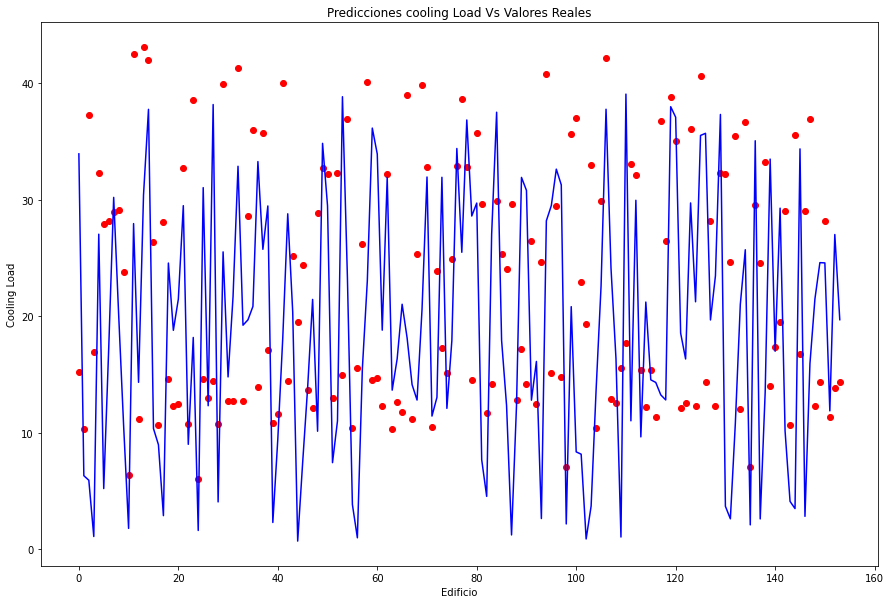

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

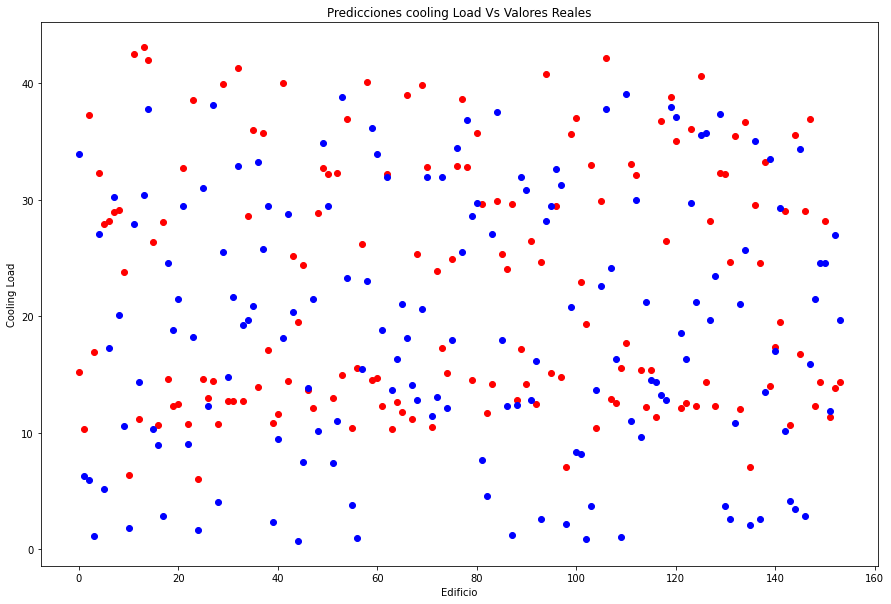

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')